In [2]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=340ea917904eaa81112bc6b5915cbf9907be76709808629bf3c0d9a0a6e3107b
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [3]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/skenario_4.csv')

In [ ]:
# prompt: pada /content/skenario_4.csv ubah fitur Ungrammatical Statement menjadi input, Standard English menjadi target, dan Error Type menjadi error_type lalu save lagi

# Mengganti nama kolom 'Ungrammatical Statement' menjadi 'input', 'Standard English' menjadi 'target', dan 'Error Type' menjadi 'error_type'
df = df.rename(columns={'input' : 'Ungrammatical Statement', 'target' : 'Standard English', "error_type" : 'Error Type'})

# Menyimpan kembali DataFrame ke file CSV
df.to_csv('/content/skenario_4.csv', index=False)

print(f"Kolom berhasil diganti namanya dan file '/content/skenario_4.csv' berhasil diperbarui.")
print(f"Dataset setelah rename kolom:")
print(df.head()) # Menampilkan beberapa baris pertama untuk verifikasi


Kolom berhasil diganti namanya dan file '/content/skenario_4.csv' berhasil diperbarui.
Dataset setelah rename kolom:
                             Ungrammatical Statement  \
0  She was angry and furious furious about the si...   
1  The hikers are enjoying a view from a top of m...   
2  The teacher is helping a students with a homew...   
3  The couple is taking vacation in a tropical is...   
4              She is waiting for bus at a bus stop.   

                                    Standard English     Error Type  
0               She was furious about the situation.  Article Usage  
1  The hikers are enjoying the view from the top ...  Article Usage  
2  The teacher is helping the students with their...  Article Usage  
3  The couple is taking a vacation on a tropical ...  Article Usage  
4        She is waiting for the bus at the bus stop.  Article Usage  


# Memastikan nama fitur sebelum di train

In [6]:
# prompt: dari datasets_info = [
#     ('/content/Skenario 1 (errant).csv', 'Skenario 1'),
#     ('/content/Skenario 2 (shadow labeling dan augmentasi).csv', 'Skenario 2'),
#     ('/content/skenario_3.csv', 'Skenario 3'),
#     ('/content/skenario_4.csv', 'Skenario 4')
# ]
# pastikan hanya ada fitur input, target, Error Type. kalau ada Ungrammatical Statement diganti input kalau ada Standard English diganti target kalau ada error_type danti Error Type

import pandas as pd
datasets_info = [
    ('/content/Skenario 1 (errant).csv', 'Skenario 1'),
    ('/content/Skenario 2 (shadow labeling dan augmentasi).csv', 'Skenario 2'),
    ('/content/skenario_3.csv', 'Skenario 3'),
    ('/content/skenario_4.csv', 'Skenario 4')
]

for file_path, scenario_name in datasets_info:
    try:
        df = pd.read_csv(file_path)

        # Rename columns
        df = df.rename(columns={
            'Ungrammatical Statement': 'input',
            'Standard English': 'target',
            'error_type': 'Error Type' # Assuming 'error_type' is the original name for the column you want to rename to 'Error Type'
        })

        # Select only the desired columns
        df = df[['input', 'target', 'Error Type']]

        # Save the modified DataFrame back to the same CSV file
        df.to_csv(file_path, index=False)

        print(f"Processed '{scenario_name}': Columns renamed and file updated.")
        print(f"Dataset '{scenario_name}' after processing:")
        print(df.head()) # Display first few rows for verification

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except KeyError as e:
        print(f"Error: Column not found in {file_path}. Missing column: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")

print("\nFinished processing all datasets.")


Processed 'Skenario 1': Columns renamed and file updated.
Dataset 'Skenario 1' after processing:
                                               input  \
0  The series of lectures on history was very inf...   
1  The audience was clapping their hands enthusia...   
2             The movie am starting in five minutes.   
3       My 1 0th exam and 1 2th exam is very good .    
4              The flowers is growing in the garden.   

                                              target  Error Type  
0  The series of lectures on history were very in...  R:VERB:SVA  
1  The audience were clapping their hands enthusi...  R:VERB:SVA  
2             The movie is starting in five minutes.  R:VERB:SVA  
3      My 1 0th exam and 1 2th exam are very good .   R:VERB:SVA  
4             The flowers are growing in the garden.  R:VERB:SVA  
Processed 'Skenario 2': Columns renamed and file updated.
Dataset 'Skenario 2' after processing:
                                               input  \
0  So the s

# Training menggunakan T5 

Download complete.

  MEMULAI PROSES UNTUK: SKENARIO 1 DENGAN K-FOLD CROSS-VALIDATION

Dataset 'Skenario 1' dimuat: 1640 baris.

--- Memulai Fold 1/5 untuk Skenario 1 ---


Map:   0%|          | 0/1312 [00:00<?, ? examples/s]

Map:   0%|          | 0/328 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 1, Fold 1...


Epoch,Training Loss,Validation Loss
1,0.537700,0.130566
2,0.122100,0.089003
3,0.077600,0.070189
4,0.052400,0.064789
5,0.036900,0.063763
6,0.027300,0.061559
7,0.020300,0.064348
8,0.016700,0.064084
9,0.014000,0.064544
10,0.011700,0.065002


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 1, Fold 1 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 1) ---


Generating predictions:   0%|          | 0/82 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       48.48           98.86            100.0         98.86           99.43 77.77   89.18    99.08    98.22    99.06

--- Metrik Keseluruhan Data Validasi (Fold 1) ---


Generating predictions:   0%|          | 0/21 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       36.59           92.38            100.0         92.38           96.04 72.81   85.98     95.1    89.49     94.8

--- Performa Mendalam per Error Type untuk Skenario 1 (Data Validasi Fold 1) ---

--- Memulai Fold 2/5 untuk Skenario 1 ---


Map:   0%|          | 0/1312 [00:00<?, ? examples/s]

Map:   0%|          | 0/328 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 1, Fold 2...


Epoch,Training Loss,Validation Loss
1,0.531400,0.132554
2,0.129700,0.081646
3,0.080400,0.059155
4,0.054500,0.050931
5,0.038400,0.048501
6,0.028300,0.050013
7,0.021900,0.049389
8,0.017000,0.049832
9,0.013800,0.051926
10,0.011600,0.050459


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 1, Fold 2 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 2) ---


Generating predictions:   0%|          | 0/82 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       46.72           98.09            100.0         98.09           99.04  77.2   88.68    98.49     97.1    98.43

--- Metrik Keseluruhan Data Validasi (Fold 2) ---


Generating predictions:   0%|          | 0/21 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       39.94           92.99            100.0         92.99           96.37 72.17   86.67    95.92    91.31    95.61

--- Performa Mendalam per Error Type untuk Skenario 1 (Data Validasi Fold 2) ---

--- Memulai Fold 3/5 untuk Skenario 1 ---


Map:   0%|          | 0/1312 [00:00<?, ? examples/s]

Map:   0%|          | 0/328 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 1, Fold 3...


Epoch,Training Loss,Validation Loss
1,0.498400,0.135633
2,0.124200,0.092214
3,0.076400,0.074802
4,0.052000,0.066839
5,0.038100,0.064602
6,0.028500,0.060839
7,0.022200,0.061526
8,0.017600,0.059500
9,0.014500,0.061892
10,0.011600,0.063981


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 1, Fold 3 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 3) ---


Generating predictions:   0%|          | 0/82 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       50.38           99.09            100.0         99.09           99.54 79.13   89.83    99.36    98.83    99.36

--- Metrik Keseluruhan Data Validasi (Fold 3) ---


Generating predictions:   0%|          | 0/21 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       34.45           94.82            100.0         94.82           97.34 70.91   84.93    95.41    90.53    95.19

--- Performa Mendalam per Error Type untuk Skenario 1 (Data Validasi Fold 3) ---

--- Memulai Fold 4/5 untuk Skenario 1 ---


Map:   0%|          | 0/1312 [00:00<?, ? examples/s]

Map:   0%|          | 0/328 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 1, Fold 4...


Epoch,Training Loss,Validation Loss
1,0.564900,0.144857
2,0.120900,0.098177
3,0.076600,0.076500
4,0.051900,0.068078
5,0.036700,0.062669
6,0.027700,0.060340
7,0.021000,0.059066
8,0.015900,0.059925
9,0.013100,0.061836
10,0.011400,0.062008


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 1, Fold 4 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 4) ---


Generating predictions:   0%|          | 0/82 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       51.45           99.47            100.0         99.47           99.73 79.09   89.97     99.3    98.67    99.29

--- Metrik Keseluruhan Data Validasi (Fold 4) ---


Generating predictions:   0%|          | 0/21 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       32.01           92.38            100.0         92.38           96.04 69.71   83.84    95.12     90.1    95.03

--- Performa Mendalam per Error Type untuk Skenario 1 (Data Validasi Fold 4) ---

--- Memulai Fold 5/5 untuk Skenario 1 ---


Map:   0%|          | 0/1312 [00:00<?, ? examples/s]

Map:   0%|          | 0/328 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 1, Fold 5...


Epoch,Training Loss,Validation Loss
1,0.526000,0.141785
2,0.125300,0.094090
3,0.074900,0.075428
4,0.049700,0.067206
5,0.036900,0.066808
6,0.028000,0.065876
7,0.021200,0.065762
8,0.015600,0.066459
9,0.012800,0.067557
10,0.011200,0.067838


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 1, Fold 5 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 5) ---


Generating predictions:   0%|          | 0/82 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        49.7           99.24            100.0         99.24           99.62 78.76   89.63    99.37     98.8    99.37

--- Metrik Keseluruhan Data Validasi (Fold 5) ---


Generating predictions:   0%|          | 0/21 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        37.8           92.07            100.0         92.07           95.87 72.85   86.35    95.66    90.63    95.35

--- Performa Mendalam per Error Type untuk Skenario 1 (Data Validasi Fold 5) ---

  HASIL AKHIR AGREGASI UNTUK: SKENARIO 1 (OVERALL)


--- Rata-rata Metrik Keseluruhan Data Pelatihan dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       49.34           98.95            100.0         98.95           99.47 78.39   89.46    99.12    98.32     99.1

--- Rata-rata Metrik Keseluruhan Data Validasi dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       36.16           92.93            100.0         92.93           96.33 71.69   85.55    95.44    90.41    95.19

--- Rata-rata Performa Mendalam

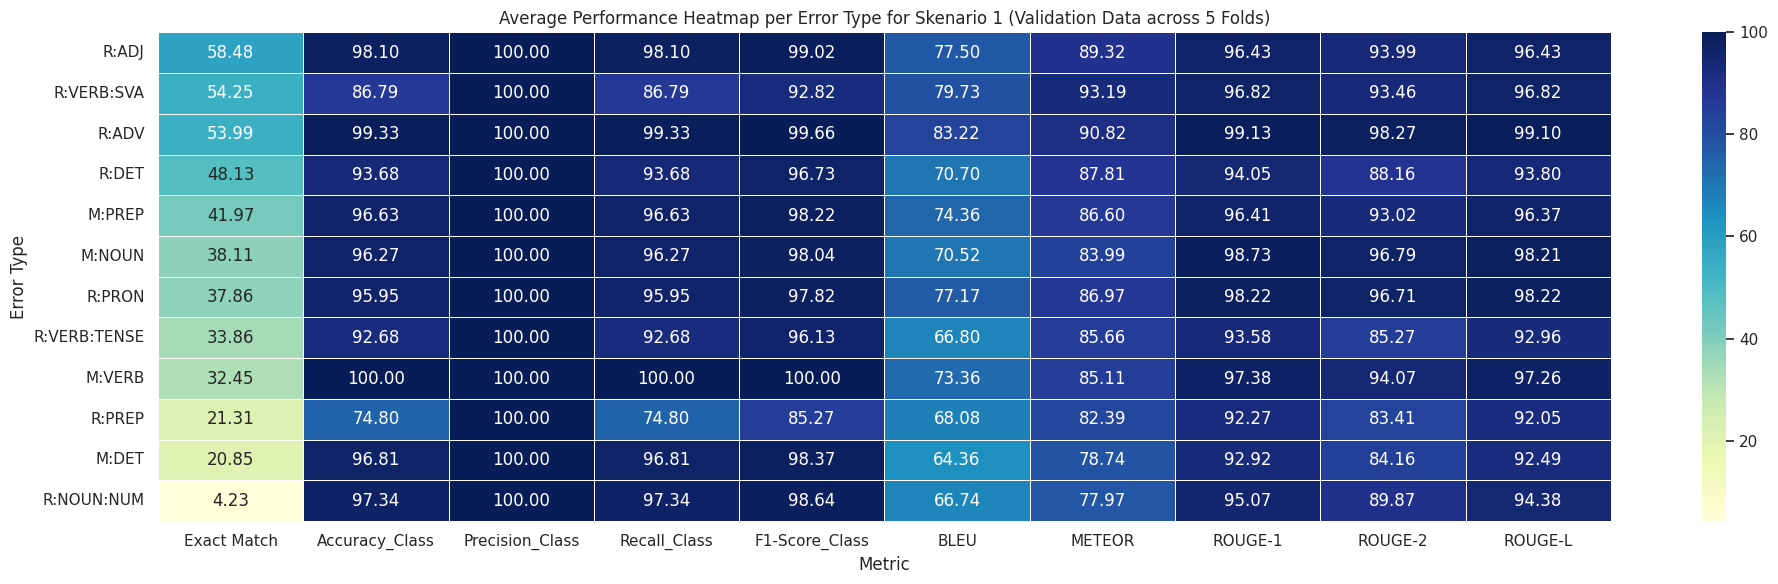


  MEMULAI PROSES UNTUK: SKENARIO 2 DENGAN K-FOLD CROSS-VALIDATION

Dataset 'Skenario 2' dimuat: 1122 baris.

--- Memulai Fold 1/5 untuk Skenario 2 ---


Map:   0%|          | 0/897 [00:00<?, ? examples/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 2, Fold 1...


Epoch,Training Loss,Validation Loss
1,0.494000,0.046876
2,0.044900,0.028994
3,0.026100,0.023645
4,0.017200,0.022626
5,0.010600,0.022245
6,0.007400,0.020433
7,0.005700,0.022382
8,0.004700,0.024863
9,0.004000,0.024400
10,0.003300,0.025449


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 2, Fold 1 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 1) ---


Generating predictions:   0%|          | 0/57 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       85.51            98.1            98.96         99.08           99.02 92.69   96.22    99.65     99.3    99.65

--- Metrik Keseluruhan Data Validasi (Fold 1) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       70.67            88.0            99.48         88.02            93.4 87.02   93.66    97.74     94.7    97.57

--- Performa Mendalam per Error Type untuk Skenario 2 (Data Validasi Fold 1) ---

--- Memulai Fold 2/5 untuk Skenario 2 ---


Map:   0%|          | 0/897 [00:00<?, ? examples/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 2, Fold 2...


Epoch,Training Loss,Validation Loss
1,0.489500,0.045212
2,0.044000,0.032435
3,0.023900,0.029796
4,0.016400,0.025219
5,0.010600,0.027181
6,0.008200,0.027595
7,0.005500,0.027467
8,0.004700,0.028840
9,0.003400,0.030542


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 2, Fold 2 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 2) ---


Generating predictions:   0%|          | 0/57 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       81.61           96.21            99.05         96.99           98.01 90.63   95.28     99.2    98.33    99.11

--- Metrik Keseluruhan Data Validasi (Fold 2) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       71.11           90.67            99.01         91.32           95.01 85.48   93.83    97.69    94.01    96.43

--- Performa Mendalam per Error Type untuk Skenario 2 (Data Validasi Fold 2) ---

--- Memulai Fold 3/5 untuk Skenario 2 ---


Map:   0%|          | 0/898 [00:00<?, ? examples/s]

Map:   0%|          | 0/224 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 2, Fold 3...


Epoch,Training Loss,Validation Loss
1,0.519500,0.047987
2,0.044800,0.033707
3,0.025000,0.025652
4,0.016300,0.022850
5,0.010700,0.022175
6,0.008900,0.021677
7,0.005800,0.022081
8,0.003900,0.024044
9,0.003200,0.025208
10,0.002700,0.025454


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 2, Fold 3 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 3) ---


Generating predictions:   0%|          | 0/57 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        85.3           97.66            98.84         98.73           98.79 93.07   96.09    99.61    99.21    99.51

--- Metrik Keseluruhan Data Validasi (Fold 3) ---


Generating predictions:   0%|          | 0/14 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       70.98           91.07             99.5         91.24           95.19 85.35   93.43    98.02     95.0    97.59

--- Performa Mendalam per Error Type untuk Skenario 2 (Data Validasi Fold 3) ---

--- Memulai Fold 4/5 untuk Skenario 2 ---


Map:   0%|          | 0/898 [00:00<?, ? examples/s]

Map:   0%|          | 0/224 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 2, Fold 4...


Epoch,Training Loss,Validation Loss
1,0.488300,0.053647
2,0.044100,0.033081
3,0.025800,0.024961
4,0.015000,0.021168
5,0.009700,0.020562
6,0.008000,0.019498
7,0.006200,0.018791
8,0.004700,0.018272
9,0.004000,0.018726
10,0.003300,0.018189


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 2, Fold 4 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 4) ---


Generating predictions:   0%|          | 0/57 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       87.08           98.66            99.08         99.54           99.31 93.69   96.54     99.9     99.8     99.9

--- Metrik Keseluruhan Data Validasi (Fold 4) ---


Generating predictions:   0%|          | 0/14 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       70.98           91.07             99.0         91.67           95.19 85.13   92.89    97.86    94.91    97.11

--- Performa Mendalam per Error Type untuk Skenario 2 (Data Validasi Fold 4) ---

--- Memulai Fold 5/5 untuk Skenario 2 ---


Map:   0%|          | 0/898 [00:00<?, ? examples/s]

Map:   0%|          | 0/224 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 2, Fold 5...


Epoch,Training Loss,Validation Loss
1,0.523100,0.051308
2,0.042900,0.030927
3,0.023800,0.024074
4,0.015300,0.019186
5,0.011400,0.017474
6,0.007800,0.017387
7,0.006200,0.016190
8,0.004300,0.016930
9,0.003700,0.017216
10,0.003200,0.016919


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 2, Fold 5 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 5) ---


Generating predictions:   0%|          | 0/57 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        86.3           98.89            99.31         99.54           99.43 93.09   96.32    99.84    99.68    99.84

--- Metrik Keseluruhan Data Validasi (Fold 5) ---


Generating predictions:   0%|          | 0/14 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       79.02            94.2            98.09         95.79           96.93 89.26    94.4    98.29    96.41     98.2

--- Performa Mendalam per Error Type untuk Skenario 2 (Data Validasi Fold 5) ---

  HASIL AKHIR AGREGASI UNTUK: SKENARIO 2 (OVERALL)


--- Rata-rata Metrik Keseluruhan Data Pelatihan dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       85.16           97.91            99.05         98.78           98.91 92.63   96.09    99.64    99.26     99.6

--- Rata-rata Metrik Keseluruhan Data Validasi dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       72.55            91.0            99.01         91.61           95.14 86.45   93.64    97.92    95.01    97.38

--- Rata-rata Performa Mendalam

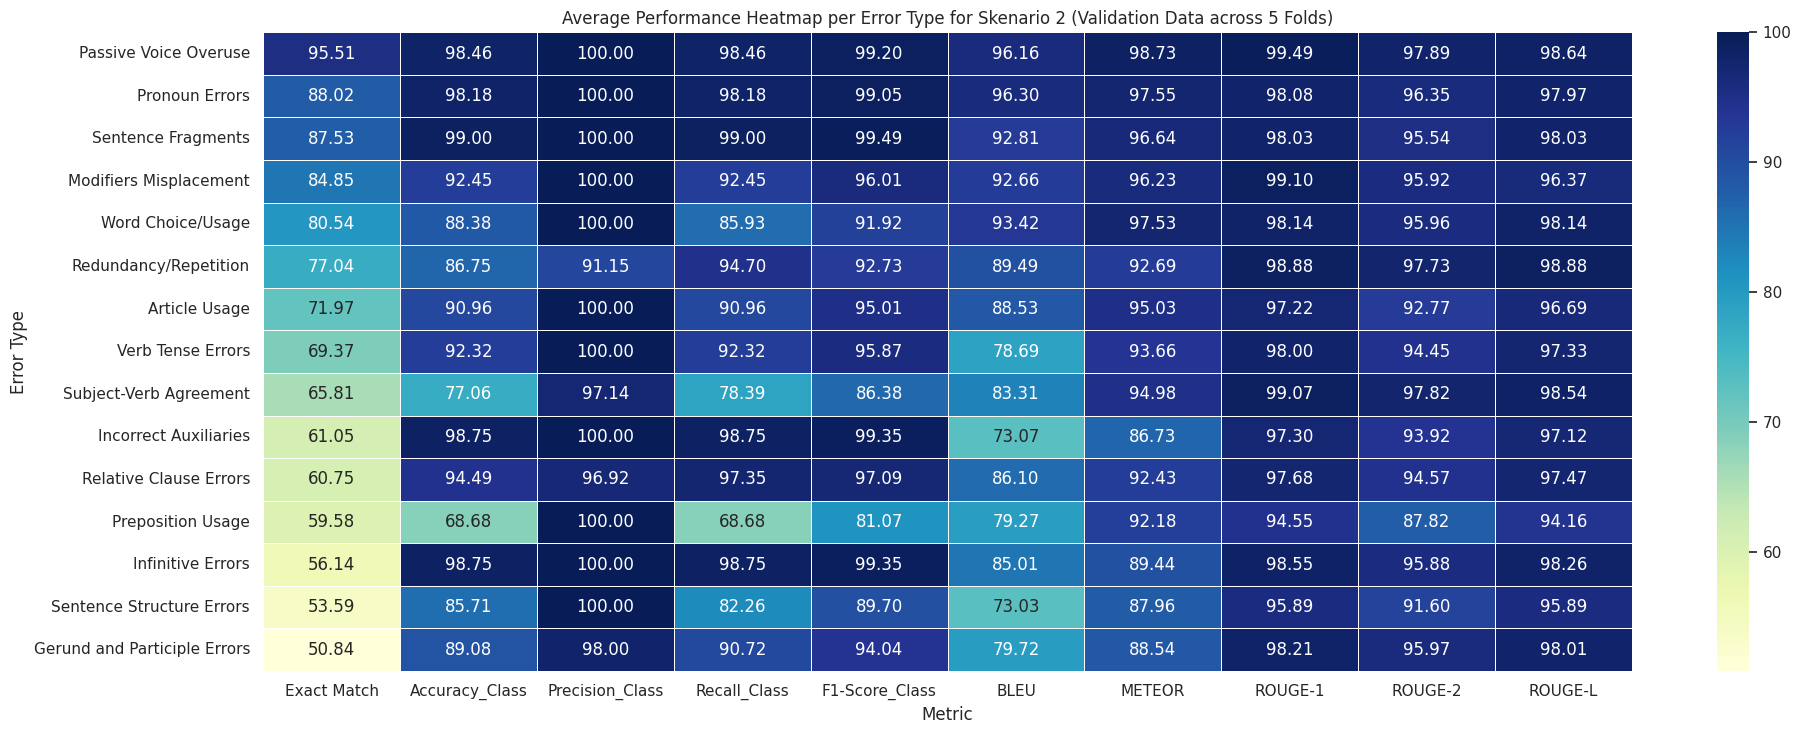


  MEMULAI PROSES UNTUK: SKENARIO 3 DENGAN K-FOLD CROSS-VALIDATION

Dataset 'Skenario 3' dimuat: 1200 baris.

--- Memulai Fold 1/5 untuk Skenario 3 ---


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 3, Fold 1...


Epoch,Training Loss,Validation Loss
1,0.412000,0.027383
2,0.027100,0.021860
3,0.017800,0.019262
4,0.011700,0.016542
5,0.008800,0.016754
6,0.006600,0.016870
7,0.004800,0.016561
8,0.003900,0.016782
9,0.002800,0.017931


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 3, Fold 1 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 1) ---


Generating predictions:   0%|          | 0/60 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       93.23           95.94            100.0         95.75           97.83 97.29   98.72    99.16    98.07    98.99

--- Metrik Keseluruhan Data Validasi (Fold 1) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       74.58           85.42            100.0         84.72           91.73 89.26   95.73    97.56    93.44    96.59

--- Performa Mendalam per Error Type untuk Skenario 3 (Data Validasi Fold 1) ---

--- Memulai Fold 2/5 untuk Skenario 3 ---


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 3, Fold 2...


Epoch,Training Loss,Validation Loss
1,0.439700,0.029005
2,0.027500,0.023181
3,0.016400,0.021432
4,0.010300,0.020164
5,0.008600,0.020314
6,0.006200,0.021485
7,0.004400,0.022374
8,0.003900,0.020184
9,0.003200,0.021228


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 3, Fold 2 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 2) ---


Generating predictions:   0%|          | 0/60 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       93.96           96.15            100.0         95.97           97.94  97.7   98.94    99.32    98.34    99.18

--- Metrik Keseluruhan Data Validasi (Fold 2) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       73.75           83.33            99.48         83.04           90.52  88.8   95.29    97.15    92.23    96.11

--- Performa Mendalam per Error Type untuk Skenario 3 (Data Validasi Fold 2) ---

--- Memulai Fold 3/5 untuk Skenario 3 ---


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 3, Fold 3...


Epoch,Training Loss,Validation Loss
1,0.430000,0.032273
2,0.026500,0.024861
3,0.015800,0.022384
4,0.012600,0.020954
5,0.008600,0.021863
6,0.006700,0.021029
7,0.004900,0.019932
8,0.003700,0.020309
9,0.003000,0.021988
10,0.002200,0.023613


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 3, Fold 3 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 3) ---


Generating predictions:   0%|          | 0/60 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       98.65           99.17            100.0         99.12           99.56 99.45   99.61    99.79    99.52    99.73

--- Metrik Keseluruhan Data Validasi (Fold 3) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        75.0            87.5            100.0         87.12           93.12 88.73    95.9    97.31    93.12    96.34

--- Performa Mendalam per Error Type untuk Skenario 3 (Data Validasi Fold 3) ---

--- Memulai Fold 4/5 untuk Skenario 3 ---


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 3, Fold 4...


Epoch,Training Loss,Validation Loss
1,0.440000,0.033303
2,0.028000,0.025352
3,0.016800,0.021925
4,0.012300,0.020494
5,0.007900,0.020861
6,0.006600,0.021065
7,0.004900,0.022017
8,0.003700,0.021588
9,0.003100,0.020863


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 3, Fold 4 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 4) ---


Generating predictions:   0%|          | 0/60 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       93.02           96.88            100.0         96.74           98.34 97.22   98.59    99.18     98.0    98.93

--- Metrik Keseluruhan Data Validasi (Fold 4) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       68.75           81.67            99.46         80.97           89.27 86.89   95.38    96.78    91.97    96.28

--- Performa Mendalam per Error Type untuk Skenario 3 (Data Validasi Fold 4) ---

--- Memulai Fold 5/5 untuk Skenario 3 ---


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 3, Fold 5...


Epoch,Training Loss,Validation Loss
1,0.414500,0.029630
2,0.026900,0.024692
3,0.016100,0.019862
4,0.011500,0.021558
5,0.008400,0.019337
6,0.005600,0.020792
7,0.004900,0.020351
8,0.004400,0.021101
9,0.003200,0.019942
10,0.002600,0.020761


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 3, Fold 5 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 5) ---


Generating predictions:   0%|          | 0/60 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       96.35           98.33            100.0         98.26           99.12  98.6   99.23    99.51    98.87    99.47

--- Metrik Keseluruhan Data Validasi (Fold 5) ---


Generating predictions:   0%|          | 0/15 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       76.25           86.67            100.0         86.03           92.49 91.02   96.16    97.27    93.66    96.87

--- Performa Mendalam per Error Type untuk Skenario 3 (Data Validasi Fold 5) ---

  HASIL AKHIR AGREGASI UNTUK: SKENARIO 3 (OVERALL)


--- Rata-rata Metrik Keseluruhan Data Pelatihan dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       95.04           97.29            100.0         97.17           98.56 98.05   99.02    99.39    98.56    99.26

--- Rata-rata Metrik Keseluruhan Data Validasi dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       73.67           84.92            99.79         84.38           91.42 88.94   95.69    97.21    92.89    96.44

--- Rata-rata Performa Mendalam

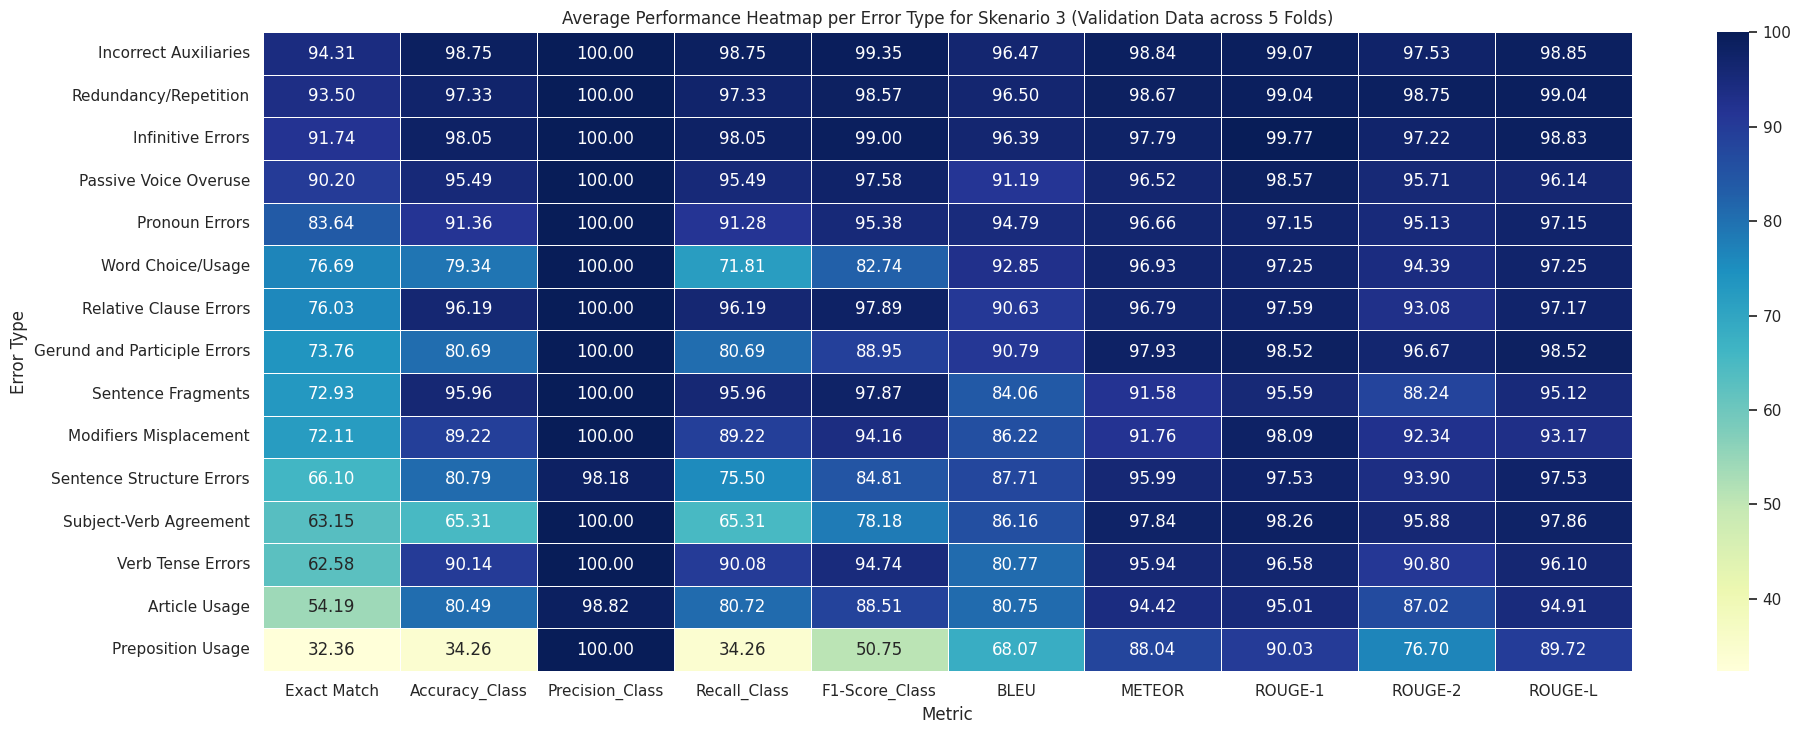


  MEMULAI PROSES UNTUK: SKENARIO 4 DENGAN K-FOLD CROSS-VALIDATION

Dataset 'Skenario 4' dimuat: 1750 baris.

--- Memulai Fold 1/5 untuk Skenario 4 ---


Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 4, Fold 1...


Epoch,Training Loss,Validation Loss
1,0.371100,0.057944
2,0.048400,0.044925
3,0.030700,0.039855
4,0.020800,0.034997
5,0.015400,0.034015
6,0.011500,0.034065
7,0.008600,0.034494
8,0.006900,0.034468
9,0.005500,0.034273
10,0.004400,0.037063


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 4, Fold 1 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 1) ---


Generating predictions:   0%|          | 0/88 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       83.57           96.79            98.19         98.26           98.22  90.3   96.06    99.25    98.46    99.17

--- Metrik Keseluruhan Data Validasi (Fold 1) ---


Generating predictions:   0%|          | 0/22 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       69.14           88.86            97.29         90.25           93.64 81.51   93.09    97.13    93.32    96.73

--- Performa Mendalam per Error Type untuk Skenario 4 (Data Validasi Fold 1) ---

--- Memulai Fold 2/5 untuk Skenario 4 ---


Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 4, Fold 2...


Epoch,Training Loss,Validation Loss
1,0.364600,0.056188
2,0.047100,0.043639
3,0.030000,0.038166
4,0.019300,0.038474
5,0.015000,0.038037
6,0.010600,0.038490
7,0.008000,0.038955
8,0.006900,0.037466
9,0.005200,0.039390
10,0.004100,0.039824


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 4, Fold 2 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 2) ---


Generating predictions:   0%|          | 0/88 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       85.93           97.57            97.98         99.37           98.67 92.18   96.71    99.84    99.58     99.8

--- Metrik Keseluruhan Data Validasi (Fold 2) ---


Generating predictions:   0%|          | 0/22 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       72.57           91.71            98.33         92.45            95.3 81.38   92.96    97.31    93.88    96.55

--- Performa Mendalam per Error Type untuk Skenario 4 (Data Validasi Fold 2) ---

--- Memulai Fold 3/5 untuk Skenario 4 ---


Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 4, Fold 3...


Epoch,Training Loss,Validation Loss
1,0.373900,0.053731
2,0.047600,0.042813
3,0.030300,0.036883
4,0.021400,0.032858
5,0.014600,0.033983
6,0.010900,0.034887
7,0.008100,0.035691
8,0.006200,0.036046
9,0.006000,0.036170


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 4, Fold 3 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 3) ---


Generating predictions:   0%|          | 0/88 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       82.71           96.07            98.26         97.41           97.83 89.26   95.66    98.93    97.76    98.82

--- Metrik Keseluruhan Data Validasi (Fold 3) ---


Generating predictions:   0%|          | 0/22 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        66.0           88.57            96.27         90.73           93.42 80.45    92.3    96.61    92.29    96.09

--- Performa Mendalam per Error Type untuk Skenario 4 (Data Validasi Fold 3) ---

--- Memulai Fold 4/5 untuk Skenario 4 ---


Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 4, Fold 4...


Epoch,Training Loss,Validation Loss
1,0.351900,0.058249
2,0.047500,0.046716
3,0.030000,0.042734
4,0.020600,0.042049
5,0.015400,0.041740
6,0.010500,0.044176
7,0.008400,0.043103
8,0.006400,0.044455
9,0.005400,0.045867
10,0.004200,0.046444


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 4, Fold 4 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 4) ---


Generating predictions:   0%|          | 0/88 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       84.14           96.71            97.72         98.65           98.19 90.45   96.17    99.39    98.75    99.35

--- Metrik Keseluruhan Data Validasi (Fold 4) ---


Generating predictions:   0%|          | 0/22 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       67.14           87.43            97.61         88.54           92.86 80.68   92.09    96.55     91.6    95.61

--- Performa Mendalam per Error Type untuk Skenario 4 (Data Validasi Fold 4) ---

--- Memulai Fold 5/5 untuk Skenario 4 ---


Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Memulai pelatihan untuk Skenario 4, Fold 5...


Epoch,Training Loss,Validation Loss
1,0.375900,0.045617
2,0.048300,0.037217
3,0.030700,0.033910
4,0.021100,0.036545
5,0.014000,0.035368
6,0.009800,0.035393
7,0.007900,0.035615
8,0.006000,0.036841


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Pelatihan untuk Skenario 4, Fold 5 selesai.

--- Metrik Keseluruhan Data Pelatihan (Fold 5) ---


Generating predictions:   0%|          | 0/88 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       77.64           94.29            97.91         95.75           96.82 86.14   94.34    98.02    96.17    97.94

--- Metrik Keseluruhan Data Validasi (Fold 5) ---


Generating predictions:   0%|          | 0/22 [00:00<?, ?it/s]

 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
       61.14           85.14             97.8          85.3           91.13 78.72   92.08    95.76    89.97    94.59

--- Performa Mendalam per Error Type untuk Skenario 4 (Data Validasi Fold 5) ---

  HASIL AKHIR AGREGASI UNTUK: SKENARIO 4 (OVERALL)


--- Rata-rata Metrik Keseluruhan Data Pelatihan dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        82.8           96.29            98.01         97.89           97.95 89.67   95.79    99.09    98.15    99.01

--- Rata-rata Metrik Keseluruhan Data Validasi dari 5 Folds ---
 Exact Match  Accuracy_Class  Precision_Class  Recall_Class  F1-Score_Class  BLEU  METEOR  ROUGE-1  ROUGE-2  ROUGE-L
        67.2           88.34            97.46         89.46           93.27 80.55   92.51    96.67    92.21    95.92

--- Rata-rata Performa Mendalam

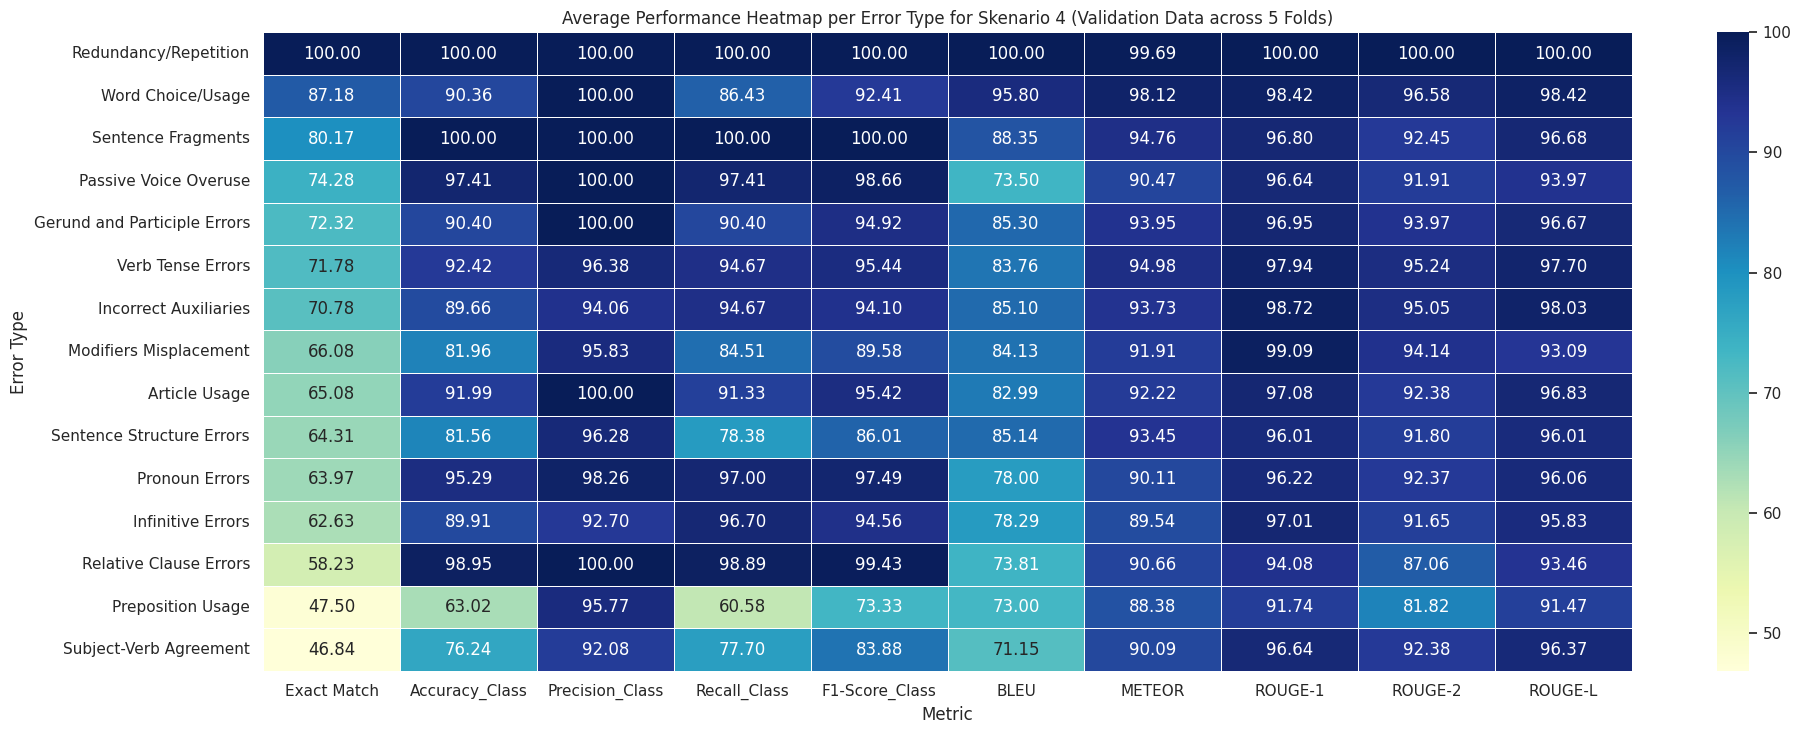



--- SEMUA EKSPERIMEN K-FOLD PER SKENARIO SELESAI ---


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import torch
import warnings
from tqdm.auto import tqdm

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Tools dari Hugging Face
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments, EarlyStoppingCallback

# Metrik Evaluasi
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score
from sklearn.model_selection import KFold # Import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk

# Download data NLTK (jika belum ada)
try:
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("Downloading necessary NLTK data (wordnet, omw-1.4)...")
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("Download complete.")

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="viridis")

# --- KONFIGURASI ---
datasets_info = [
    ('/content/Skenario 1 (errant).csv', 'Skenario 1'),
    ('/content/Skenario 2 (shadow labeling dan augmentasi).csv', 'Skenario 2'),
    ('/content/skenario_3.csv', 'Skenario 3'),
    ('/content/skenario_4.csv', 'Skenario 4')
]
best_params = {'learning_rate': 0.0003, 'num_train_epochs': 30, 'per_device_train_batch_size': 8}
EARLY_STOPPING_PATIENCE = 5
tokenizer = T5Tokenizer.from_pretrained('t5-small')
N_SPLITS = 5 # Jumlah folds untuk K-Fold Cross-Validation

def load_and_prep_data(csv_file):
    df = pd.read_csv(csv_file, dtype=str).dropna().reset_index(drop=True)
    if 'input' not in df.columns and 'Ungrammatical Statement' in df.columns: df.rename(columns={'Ungrammatical Statement': 'input'}, inplace=True)
    if 'target' not in df.columns and 'Standard English' in df.columns: df.rename(columns={'Standard English': 'target'}, inplace=True)
    return df if all(col in df.columns for col in ['input', 'target']) else None

def tokenize_data(example):
    source = "fix: " + str(example['input']); target = str(example['target'])
    source_enc = tokenizer(source, padding='max_length', truncation=True, max_length=80)
    target_enc = tokenizer(target, padding='max_length', truncation=True, max_length=80)
    return {'input_ids': source_enc['input_ids'], 'attention_mask': source_enc['attention_mask'], 'labels': target_enc['input_ids']}

def calculate_metrics(inputs, predictions, targets):
    """Fungsi pembantu untuk menghitung metrik evaluasi."""
    chencherry = SmoothingFunction()
    rouge_evaluator = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Exact Match (Prediction == Target)
    exact_match_count = sum(1 for p, t in zip(predictions, targets) if p.strip().lower() == t.strip().lower())
    exact_match = (exact_match_count / len(targets)) * 100 if len(targets) > 0 else 0

    # Metrik Klasifikasi untuk Deteksi dan Koreksi Perubahan
    # 0: Tidak ada perubahan yang diperlukan/dilakukan
    # 1: Perubahan diperlukan/dilakukan
    y_true_binary = [1 if i.strip().lower() != t.strip().lower() else 0 for i, t in zip(inputs, targets)]
    y_pred_binary = [1 if i.strip().lower() != p.strip().lower() else 0 for i, p in zip(inputs, predictions)]

    # Pastikan tidak ada kasus kosong yang menyebabkan error
    if len(y_true_binary) == 0:
        return {
            'Exact Match': 0.0, 'BLEU': 0.0, 'METEOR': 0.0, 'ROUGE-1': 0.0, 'ROUGE-2': 0.0, 'ROUGE-L': 0.0,
            'Accuracy_Class': 0.0, 'Precision_Class': 0.0, 'Recall_Class': 0.0, 'F1-Score_Class': 0.0
        }

    accuracy_class = accuracy_score(y_true_binary, y_pred_binary) * 100
    # Menggunakan zero_division=0 untuk menghindari warning jika tidak ada kelas positif atau negatif
    precision_class = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0) * 100
    recall_class = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0) * 100
    f1_class = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0) * 100


    # BLEU
    refs = [[ref.split()] for ref in targets]
    cands = [p.split() for p in predictions]
    bleu = corpus_bleu(refs, cands, smoothing_function=chencherry.method1) * 100

    # ROUGE
    scores = [rouge_evaluator.score(t, p) for t, p in zip(targets, predictions)] # Target sebagai referensi, Prediksi sebagai hipotesis
    rouge1 = np.mean([s['rouge1'].fmeasure for s in scores]) * 100
    rouge2 = np.mean([s['rouge2'].fmeasure for s in scores]) * 100
    rougeL = np.mean([s['rougeL'].fmeasure for s in scores]) * 100

    # METEOR
    meteor_scores = [meteor_score([ref.split()], pred.split()) for ref, pred in zip(targets, predictions)]
    meteor = np.mean(meteor_scores) * 100

    return {
        'Exact Match': exact_match,
        'Accuracy_Class': accuracy_class,
        'Precision_Class': precision_class,
        'Recall_Class': recall_class,
        'F1-Score_Class': f1_class,
        'BLEU': bleu,
        'METEOR': meteor,
        'ROUGE-1': rouge1,
        'ROUGE-2': rouge2,
        'ROUGE-L': rougeL
    }

def generate_predictions_batched(model, tokenizer, input_texts, device, batch_size=32, max_length=80, num_beams=4):
    """Fungsi untuk menghasilkan prediksi dalam batch untuk menghemat memori."""
    all_predictions = []
    # Clear CUDA cache before starting inference
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    for i in tqdm(range(0, len(input_texts), batch_size), desc="Generating predictions"):
        batch_texts = input_texts[i:i + batch_size]
        batch_inputs_formatted = ["fix: " + s for s in batch_texts]
        batch_encodings = tokenizer(batch_inputs_formatted, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(device)

        with torch.no_grad():
            batch_outputs = model.generate(**batch_encodings, max_length=max_length, num_beams=num_beams)

        batch_preds = tokenizer.batch_decode(batch_outputs, skip_special_tokens=True)
        all_predictions.extend(batch_preds)

        # Optionally clear cache after each batch if OOM is still an issue
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    return all_predictions


# --- LOOP UTAMA: TRAINING DAN EVALUASI PER SKENARIO ---
for csv_file, scenario_name in datasets_info:
    print(f"\n{'='*30}\n  MEMULAI PROSES UNTUK: {scenario_name.upper()} DENGAN K-FOLD CROSS-VALIDATION\n{'='*30}\n")
    try:
        scenario_df = load_and_prep_data(csv_file)
        if scenario_df is None: print(f"Dataset '{csv_file}' tidak valid. Melewatkan."); continue
        print(f"Dataset '{scenario_name}' dimuat: {len(scenario_df)} baris.")
    except FileNotFoundError:
        print(f"File '{csv_file}' tidak ditemukan. Melewatkan."); continue

    # Inisialisasi K-Fold
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

    # List untuk menyimpan metrik dari setiap fold
    all_train_metrics = []
    all_val_metrics = []
    all_error_type_results = [] # Untuk menyimpan hasil per tipe error dari setiap fold

    for fold, (train_index, val_index) in enumerate(kf.split(scenario_df)):
        print(f"\n--- Memulai Fold {fold+1}/{N_SPLITS} untuk {scenario_name} ---")

        train_df = scenario_df.iloc[train_index].reset_index(drop=True)
        val_df = scenario_df.iloc[val_index].reset_index(drop=True) # Ini adalah data validasi untuk fold ini

        train_ds = Dataset.from_pandas(train_df).map(tokenize_data);
        val_ds = Dataset.from_pandas(val_df).map(tokenize_data) # Digunakan oleh Trainer sebagai eval_dataset

        # Inisialisasi model baru untuk setiap fold untuk memastikan independensi pelatihan
        model = T5ForConditionalGeneration.from_pretrained('t5-small')

        output_dir = f'./results_{scenario_name.replace(" ", "_")}_fold{fold+1}'
        training_args = TrainingArguments(
            output_dir=output_dir,
            **best_params,
            per_device_eval_batch_size=8,
            eval_strategy='epoch', # Evaluasi per epoch
            save_strategy='epoch',
            logging_strategy='epoch',
            report_to='none',
            save_total_limit=1,
            load_best_model_at_end=True,
            metric_for_best_model='eval_loss',
            greater_is_better=False
        )
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_ds,
            eval_dataset=val_ds, # Gunakan val_ds sebagai eval_dataset untuk Trainer
            tokenizer=tokenizer,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=EARLY_STOPPING_PATIENCE)]
        )
        print(f"Memulai pelatihan untuk {scenario_name}, Fold {fold+1}...")
        trainer.train()
        print(f"Pelatihan untuk {scenario_name}, Fold {fold+1} selesai.")

        # Pindahkan model ke device untuk inferensi
        device = 'cuda' if torch.cuda.is_available() else 'cpu'; model.to(device)

        # --- INFERENSI DAN EVALUASI UNTUK DATA TRAINING (FOLD INI) ---
        print(f"\n--- Metrik Keseluruhan Data Pelatihan (Fold {fold+1}) ---")
        train_preds = generate_predictions_batched(model, tokenizer, train_df['input'].tolist(), device,
                                                   batch_size=best_params['per_device_train_batch_size'] * 2,
                                                   max_length=80, num_beams=4)

        fold_train_metrics = calculate_metrics(train_df['input'].tolist(), train_preds, train_df['target'].tolist())
        all_train_metrics.append(fold_train_metrics)
        print(pd.DataFrame([fold_train_metrics]).round(2).to_string(index=False))


        # --- INFERENSI DAN EVALUASI UNTUK DATA VALIDASI (FOLD INI) ---
        print(f"\n--- Metrik Keseluruhan Data Validasi (Fold {fold+1}) ---")
        val_preds = generate_predictions_batched(model, tokenizer, val_df['input'].tolist(), device,
                                                  batch_size=best_params['per_device_train_batch_size'] * 2,
                                                  max_length=80, num_beams=4)

        fold_val_metrics = calculate_metrics(val_df['input'].tolist(), val_preds, val_df['target'].tolist())
        all_val_metrics.append(fold_val_metrics)
        print(pd.DataFrame([fold_val_metrics]).round(2).to_string(index=False))

        # EVALUASI & VISUALISASI PER TIPE ERROR (UNTUK DATA VALIDASI FOLD INI)
        if 'Error Type' in val_df.columns:
            print(f"\n--- Performa Mendalam per Error Type untuk {scenario_name} (Data Validasi Fold {fold+1}) ---")
            eval_df_fold = val_df.copy();
            eval_df_fold['prediction'] = val_preds

            fold_results_per_type = []
            for error_type, group in eval_df_fold.groupby('Error Type'):
                inputs_group = group['input'].tolist()
                preds_group = group['prediction'].tolist()
                labels_group = group['target'].tolist()
                if not labels_group: continue

                group_metrics = calculate_metrics(inputs_group, preds_group, labels_group)
                fold_results_per_type.append({
                    'Error Type': error_type,
                    'Fold': fold + 1, # Tambahkan informasi fold
                    **group_metrics
                })
            all_error_type_results.extend(fold_results_per_type)
        else:
            print(f"\nKolom 'Error Type' tidak ditemukan di data validasi Fold {fold+1}. Evaluasi per tipe error dilewatkan.")


    # --- AGREGASI DAN TAMPILKAN HASIL AKHIR DARI SEMUA FOLD ---
    print(f"\n{'='*30}\n  HASIL AKHIR AGREGASI UNTUK: {scenario_name.upper()} (OVERALL)\n{'='*30}\n")

    # Agregasi metrik pelatihan
    if all_train_metrics:
        avg_train_metrics = pd.DataFrame(all_train_metrics).mean().to_dict()
        print(f"\n--- Rata-rata Metrik Keseluruhan Data Pelatihan dari {N_SPLITS} Folds ---")
        print(pd.DataFrame([avg_train_metrics]).round(2).to_string(index=False))

    # Agregasi metrik validasi
    if all_val_metrics:
        avg_val_metrics = pd.DataFrame(all_val_metrics).mean().to_dict()
        print(f"\n--- Rata-rata Metrik Keseluruhan Data Validasi dari {N_SPLITS} Folds ---")
        print(pd.DataFrame([avg_val_metrics]).round(2).to_string(index=False))

    # Agregasi dan visualisasi metrik per tipe error
    if all_error_type_results:
        print(f"\n--- Rata-rata Performa Mendalam per Error Type untuk {scenario_name} (Data Validasi dari {N_SPLITS} Folds) ---")
        df_all_error_type_results = pd.DataFrame(all_error_type_results)

        # Hitung rata-rata metrik per Error Type di seluruh folds
        avg_error_type_metrics = df_all_error_type_results.groupby('Error Type').mean(numeric_only=True).reset_index()

        display_cols = ['Error Type', 'Exact Match', 'Accuracy_Class', 'Precision_Class', 'Recall_Class', 'F1-Score_Class', 'BLEU', 'METEOR', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']

        print("\nTabel Rata-rata Performa Lengkap per Tipe Error:")
        print(avg_error_type_metrics[display_cols].round(2))

        # Heatmap untuk rata-rata performa per tipe error
        heatmap_cols = ['Exact Match', 'Accuracy_Class', 'Precision_Class', 'Recall_Class', 'F1-Score_Class', 'BLEU', 'METEOR', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
        df_heatmap = avg_error_type_metrics.set_index('Error Type')[heatmap_cols].sort_values(by='Exact Match', ascending=False)

        plt.figure(figsize=(20, max(6, len(df_heatmap) * 0.5)))
        sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
        plt.title(f'Average Performance Heatmap per Error Type for {scenario_name} (Validation Data across {N_SPLITS} Folds)')
        plt.xlabel('Metric'); plt.ylabel('Error Type'); plt.tight_layout()
        plt.show()
    else:
        print("\nTidak ada data 'Error Type' yang ditemukan di dataset untuk evaluasi per tipe error.")

print("\n\n--- SEMUA EKSPERIMEN K-FOLD PER SKENARIO SELESAI ---")